# Principal Component Analysis

## import library

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [65]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)
# print(number_data)
# print(number_feature)

## plot the input data

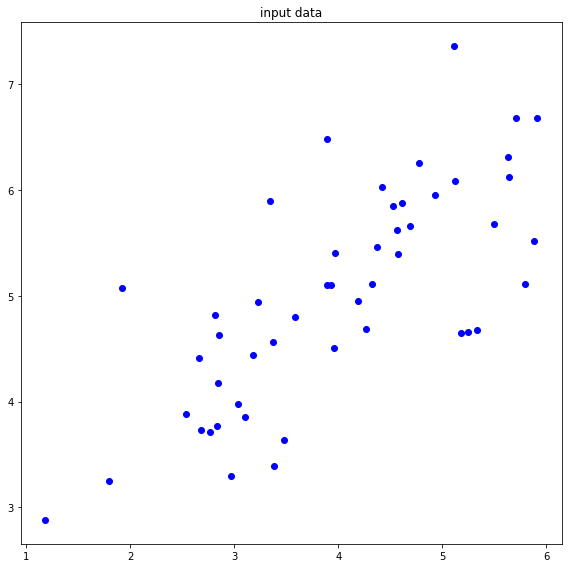

In [66]:
def plot_data(feature):
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    
    x = feature[:,0]
    y = feature[:,1]
    
    plt.scatter(x,y,color='blue')
    
    plt.tight_layout()
    plt.show()
    
plot_data(feature)

## Normalization (Z-scoring)

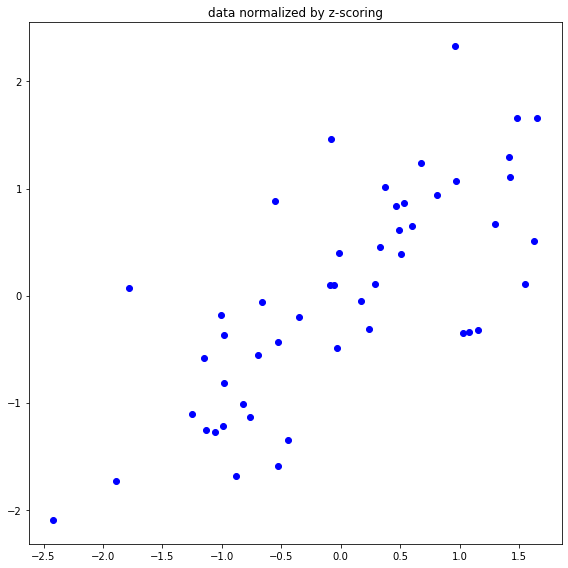

In [67]:
def normalization(feature) :
    x = feature[:,0]
    y = feature[:,1]
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = np.std(x)
    std_y = np.std(y)
#     print("mean of x =",mean_x)
#     print("mean of y =",mean_y)
#     print("std of x =",std_x)
#     print("std of y =",std_y)
    x = (x-mean_x)/std_x
    y = (y-mean_y)/std_y
    return x, y

def plot_normalization(feature) :
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    x, y = normalization(feature)
    plt.scatter(x,y,color='blue')
    
    plt.tight_layout()
    plt.show()
plot_normalization(feature)

## compute covariance matrix

In [68]:
def compute_covariance(feature):
    x, y = normalization(feature)
    Sigma = np.cov(np.transpose(x) , np.transpose(y)) 
    return Sigma
compute_covariance(feature)

array([[1.02040816, 0.75054082],
       [0.75054082, 1.02040816]])

## compute principal directions

In [69]:
def compute_eigen(X):
    S, U = np.linalg.eig(X)
    return S, U
X = compute_covariance(feature)
compute_eigen(X)

(array([1.77094898, 0.26986734]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

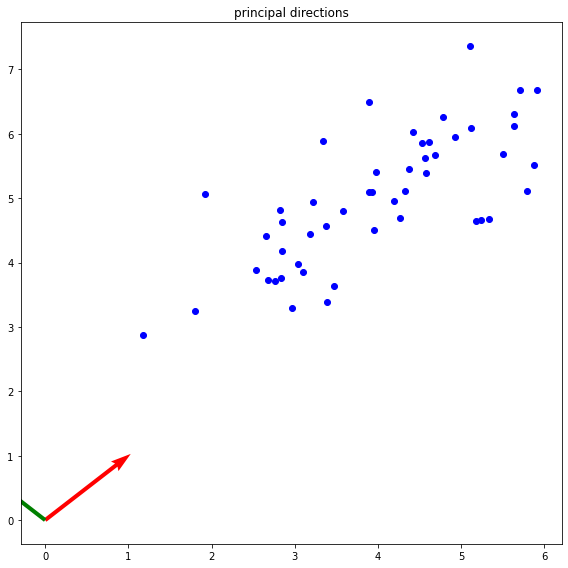

In [70]:
def plot_quiver(X):

    eigen_vec_1_S, eigen_vec_1_U = compute_eigen(X)[1][:,0]
    eigen_vec_2_S, eigen_vec_2_U = compute_eigen(X)[1][:,1]

    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.scatter(x,y,color='blue')
    plt.quiver(0,0,eigen_vec_1_S,eigen_vec_1_U,angles='xy',color='red', scale=5)
    plt.quiver(0,0,eigen_vec_2_S,eigen_vec_2_U,angles='xy',color='green', scale=5)

    plt.tight_layout()
    plt.show()

plot_quiver(X)

## first principal axis

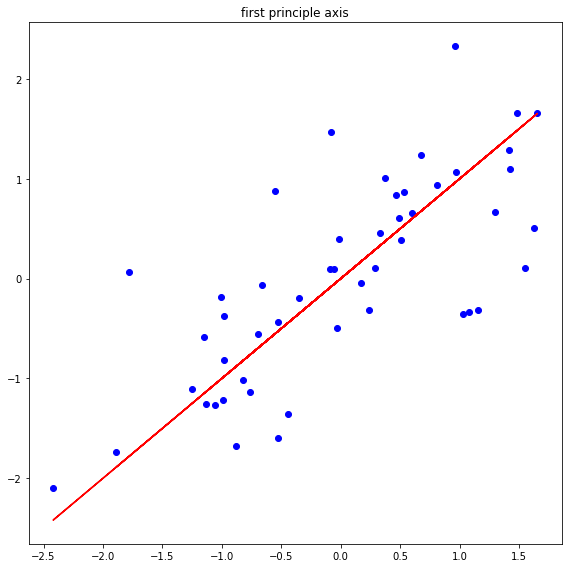

In [71]:
def plot_first_axis(X) :
    
    eigen_vec_1_S, eigen_vec_1_U = compute_eigen(X)[1][:,0]
    x, y = normalization(feature)
    
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    plt.scatter(x,y,color='blue')
    inc_1 = eigen_vec_1_U / eigen_vec_1_S
    yy = inc_1*x
    plt.plot(x,yy, '-', color = 'red')
    
    plt.tight_layout()
    plt.show()
    
plot_first_axis(X)

## second principal axis

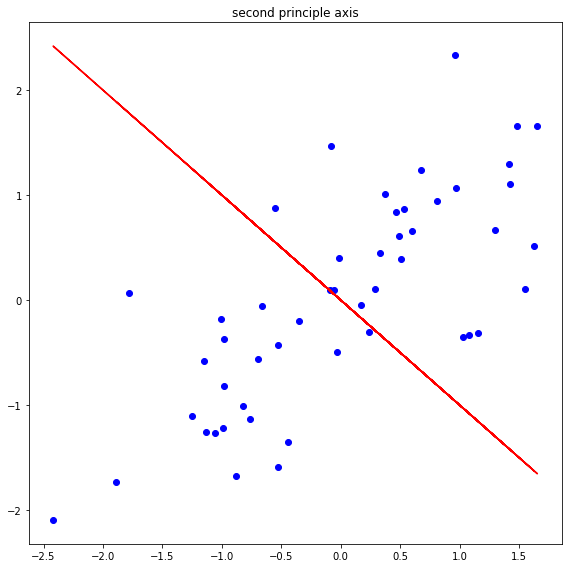

In [72]:
def plot_second_axis(X) :
    
    eigen_vec_2_S, eigen_vec_2_U = compute_eigen(X)[1][:,1]
    x, y = normalization(feature)
    
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    plt.scatter(x,y,color='blue')
    inc_2 = eigen_vec_2_U / eigen_vec_2_S
    yy = inc_2*x
    plt.plot(x,yy, '-', color = 'red')
    
    plt.tight_layout()
    plt.show()
    
plot_second_axis(X)

## compute the projection of point onto the line

In [73]:
def compute_projection_onto_line(vector0, vector1):
    
    vector = np.array([vector0, vector1])
    
    square = np.square(np.linalg.norm(vector))
    projection = []
    
    x, y = normalization(feature)
    feature[:,0]=x
    feature[:,1]=y
    for i in feature:
        vd = i.dot(vector)
        projection.append([ (vector0 * vd)/square , (vector1 * vd)/square ])
        
    projection = np.array(projection)
        
    return projection


## projcet to the first principal axis

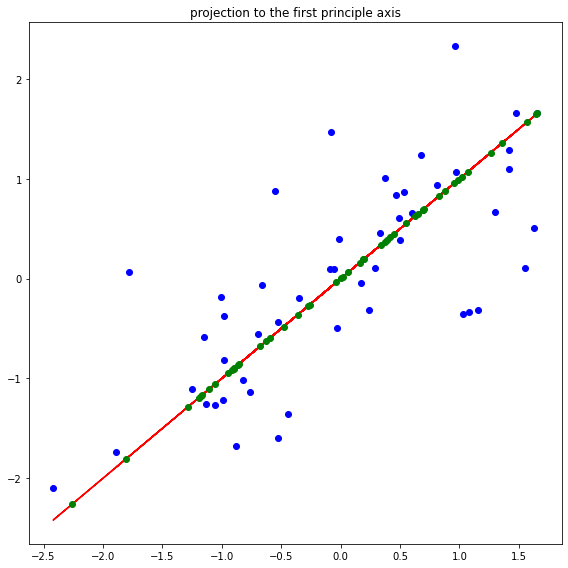

In [74]:
def plot_first_projection(X) :
    eigen_vec_1_S, eigen_vec_1_U = compute_eigen(X)[1][:,0]
    x, y = normalization(feature)
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    inc_1 = eigen_vec_1_U / eigen_vec_1_S
    plt.scatter(x,y,color='blue')
    yy = inc_1 * x
    plt.plot(x,yy, '-', color = 'red')

    res = compute_projection_onto_line(eigen_vec_1_S, eigen_vec_1_U)
    plt.scatter(res[:,0],res[:,1] , color='green', zorder=10)

    plt.tight_layout()
    plt.show()
    
plot_first_projection(X)

## projcet to the second principal axis

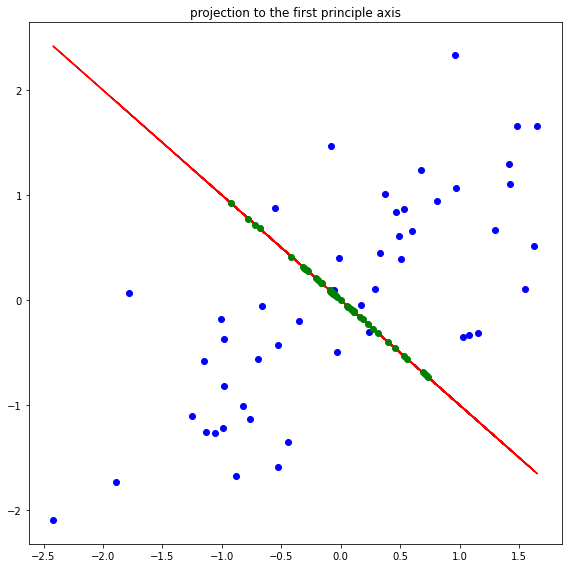

In [75]:
def plot_second_projection(X) :
    eigen_vec_2_S, eigen_vec_2_U = compute_eigen(X)[1][:,1]
    x, y = normalization(feature)
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    inc_2 = eigen_vec_2_U / eigen_vec_2_S
    plt.scatter(x,y,color='blue')
    yy = inc_2 * x
    plt.plot(x,yy, '-', color = 'red')

    res = compute_projection_onto_line(eigen_vec_2_S, eigen_vec_2_U)
    plt.scatter(res[:,0],res[:,1] , color='green', zorder=10)

    plt.tight_layout()
    plt.show()
    
plot_second_projection(X)

## connect original data to the projection onto the first principal axis

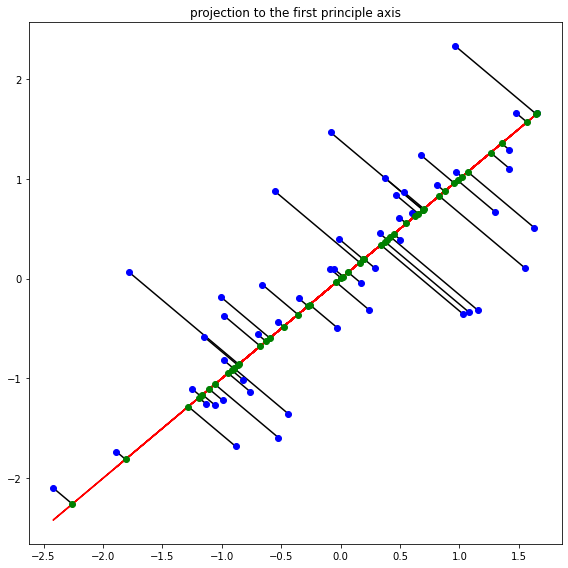

In [76]:
def plot_first_projection_axis(X) :
    eigen_vec_1_S, eigen_vec_1_U = compute_eigen(X)[1][:,0]
    x, y = normalization(feature)
    feature[:,0]=x
    feature[:,1]=y
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    inc_1 = eigen_vec_1_U / eigen_vec_1_S
    plt.scatter(x,y,color='blue',zorder=8)
    yy = inc_1 * x
    plt.plot(x,yy, '-', color = 'red')

    res = compute_projection_onto_line(eigen_vec_1_S, eigen_vec_1_U)
    plt.scatter(res[:,0],res[:,1] , color='green', zorder=10)
    
    for i in range(0, number_data):
        plt.plot([feature[i][0],res[i][0]],[feature[i][1],res[i][1]],'-',color='black')

    plt.tight_layout()
    plt.show()
    
plot_first_projection_axis(X)

## connect original data to the projection onto the second principal axis

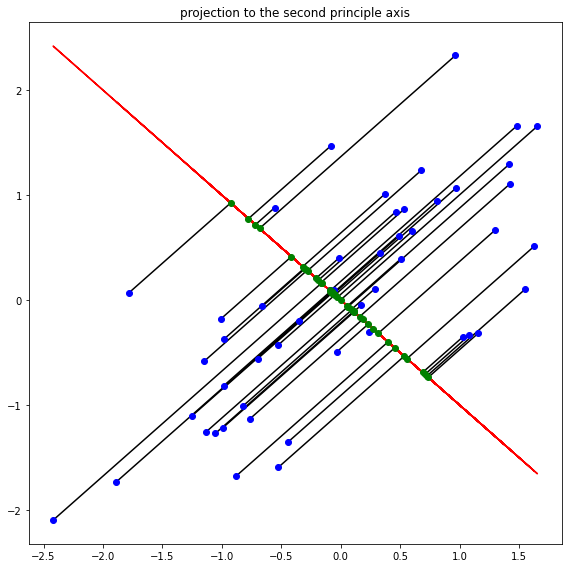

In [77]:
def plot_second_projection_axis(X) :
    eigen_vec_2_S, eigen_vec_2_U = compute_eigen(X)[1][:,1]
    x, y = normalization(feature)
    feature[:,0]=x
    feature[:,1]=y
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    inc_2 = eigen_vec_2_U / eigen_vec_2_S
    plt.scatter(x,y,color='blue',zorder=8)
    yy = inc_2 * x
    plt.plot(x,yy, '-', color = 'red')

    res = compute_projection_onto_line(eigen_vec_2_S, eigen_vec_2_U)
    plt.scatter(res[:,0],res[:,1] , color='green', zorder=10)
    
    for i in range(0, number_data):
        plt.plot([feature[i][0],res[i][0]],[feature[i][1],res[i][1]],'-',color='black')

    plt.tight_layout()
    plt.show()
    
plot_second_projection_axis(X)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

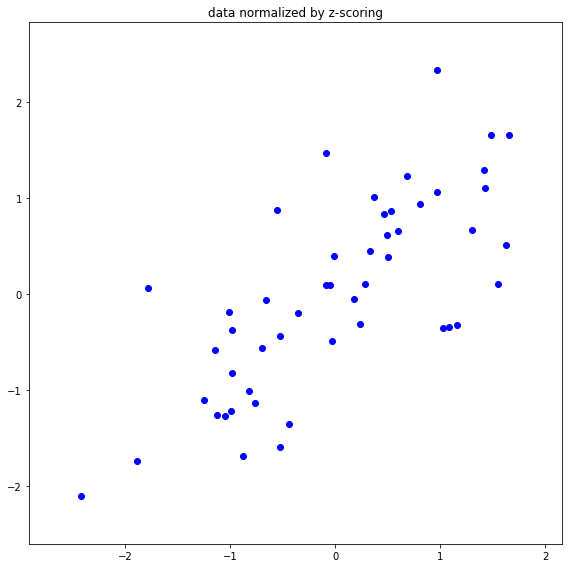

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

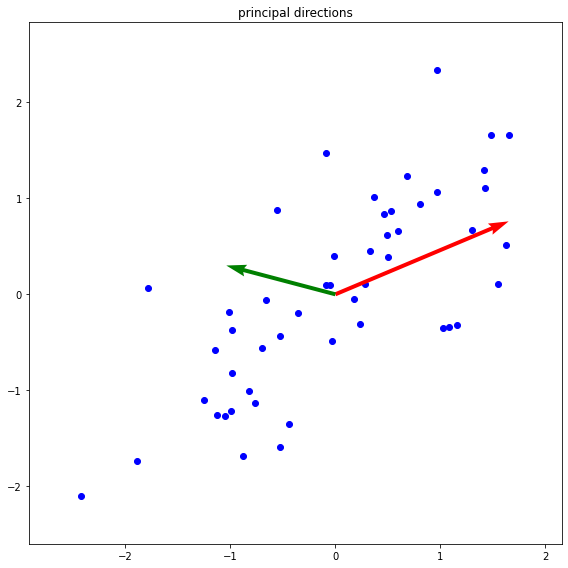

***

### 3. plot the first principal axis in red on the normalized data in blue

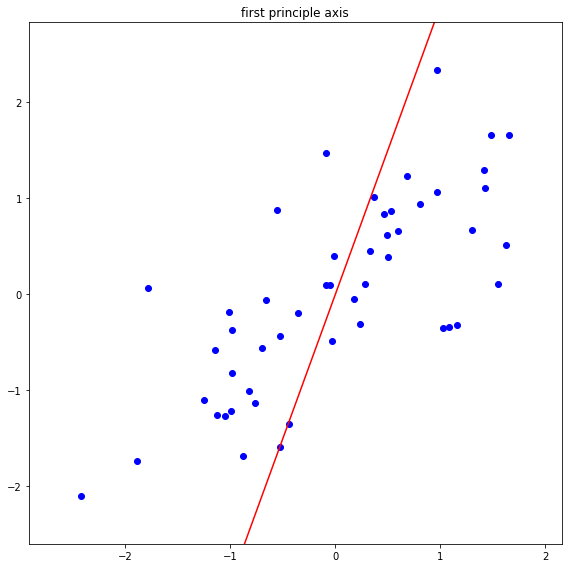

***

### 4. plot the second principal axis in red on the normalized data in blue

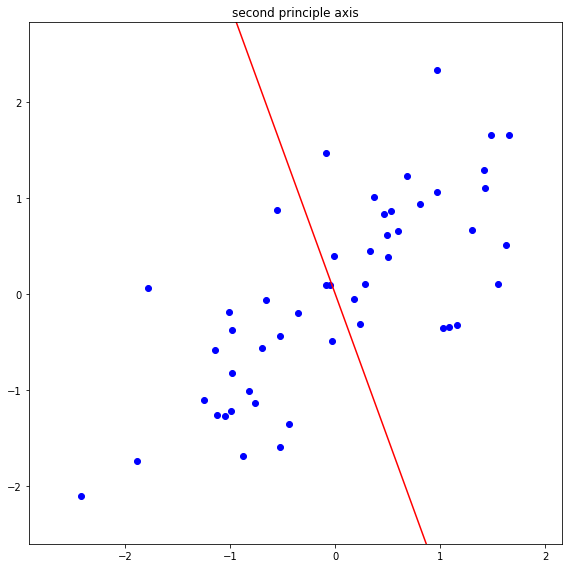

***

### 5. plot the projection of data in green onto the first principal axis in red

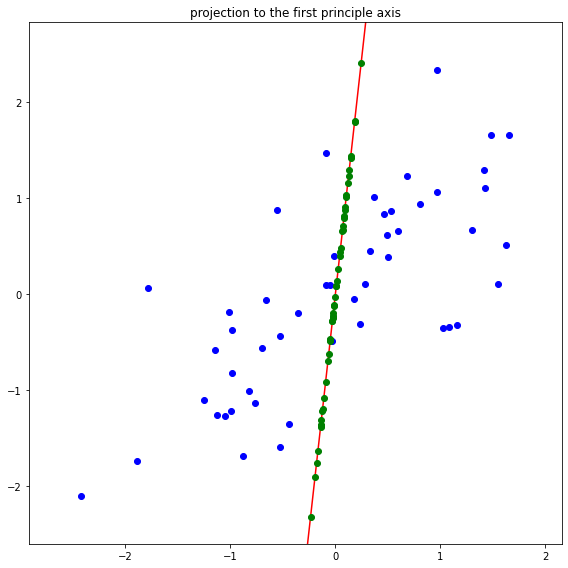

***

### 6. plot the projection of data in green onto the second principal axis in red

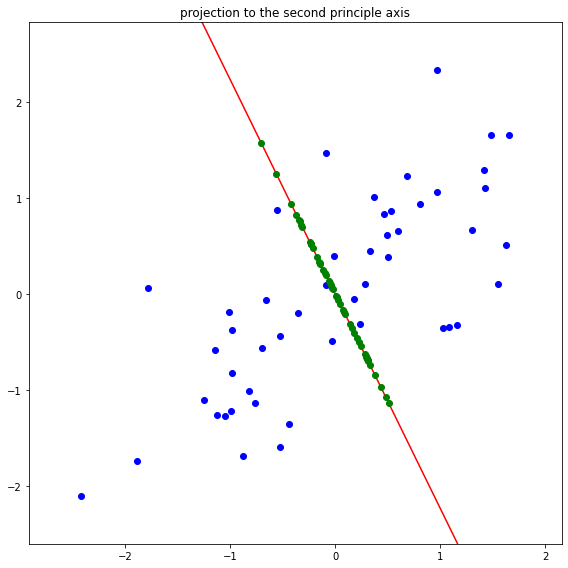

***

### 7. plot the projection line in grey onto the first principal axis

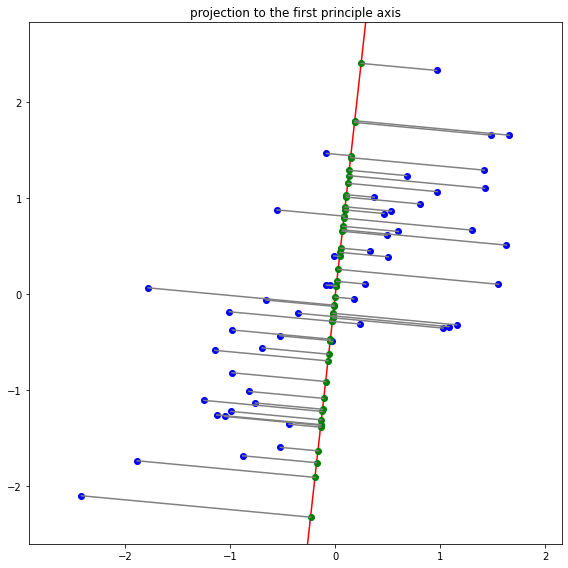

***

### 8. plot the projection line in grey onto the second principal axis

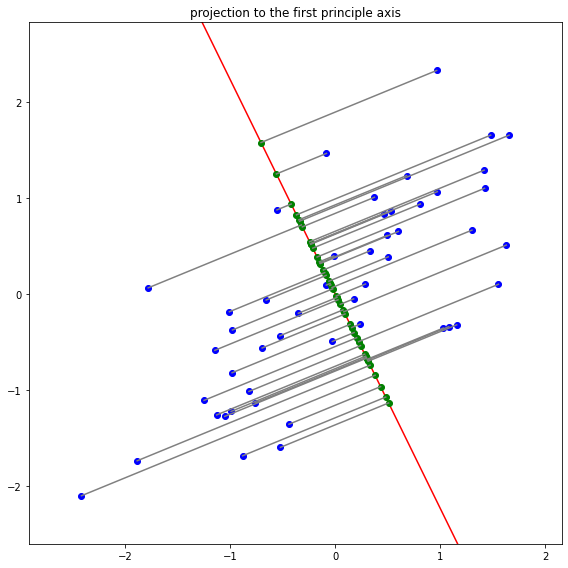

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***